,Month,Name,Demand
35,36,Dec,322.385076
36,37,Jan,237.951698
37,38,Feb,478.870715
38,39,Mar,629.901185
39,40,Apr,921.059310


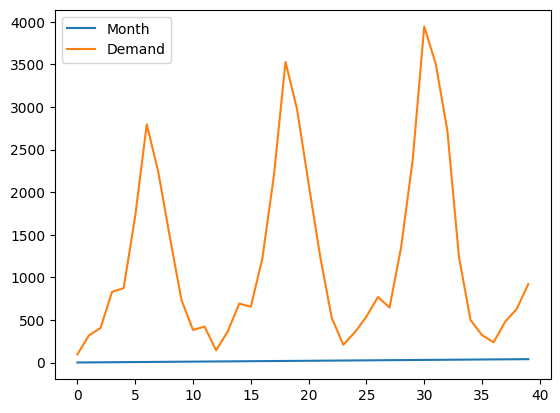

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

potting_soil = pd.read_excel('potting-soil.xlsx')
potting_soil.plot()
potting_soil.tail()

## 2.4

May forecast: 1320.4665922665517


<Axes: >

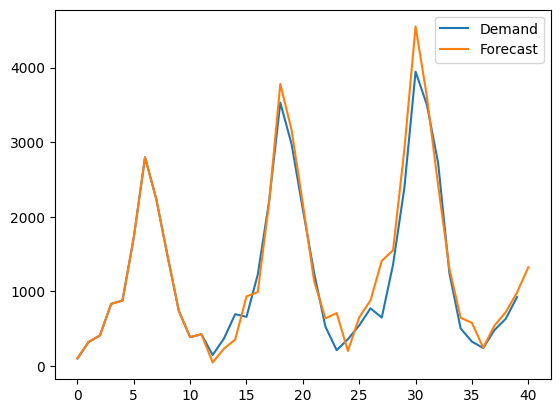

In [138]:
alpha = 0.2
beta = 0.1
gamma = 0.3

D = potting_soil["Demand"].to_numpy()

I = D[:12]
S = np.append(np.nan, D[1:12] - D[:11])
c = 12 * D[:12] / np.sum(D[:12])
y = D[:12]

for t in range(12, len(D)):
    # Add current months forcast to y
    y_t = (I[t - 1] + S[t - 1]) * c[t - 12]
    y = np.append(y, y_t)
    I_t = alpha * D[t] / c[t - 12] + (1 - alpha) * (I[t - 1] + S[t-1])
    I = np.append(I, I_t)
    S_t = beta * (I[t] - I[t-1]) + (1-beta) * S[t-1]
    S = np.append(S, S_t)
    c_t = gamma * D[t] / I[t] + (1 - gamma) * c[t - 12]
    c = np.append(c, c_t)


potting_soil["Forecast"] = y

t = len(D)
y_may = (I[t-1] + S[t - 1]) * c[t-12]
print(f"May forecast: {y_may}")

potting_soil_with_forecast = pd.concat([potting_soil, pd.DataFrame({"Demand": [np.nan], "Month": ["May"], "Forecast": [y_may]})], ignore_index=True)

potting_soil_with_forecast.plot()

## 2.6

<Axes: xlabel='Temp', ylabel='Demand'>

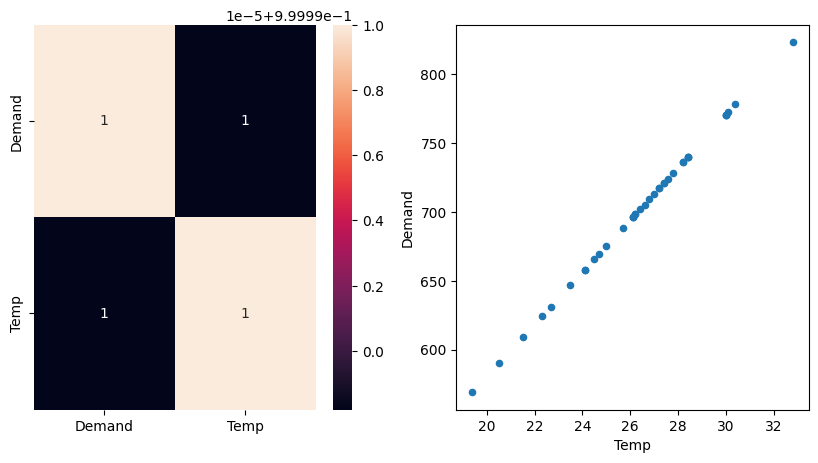

In [147]:
bottled_water = pd.read_excel('bottled-water.xlsx')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(bottled_water[["Demand", "Temp"]].corr(), annot=True, ax=ax[0]) # perfect correlation :)
bottled_water.plot.scatter(x="Temp", y="Demand", ax=ax[1])

beta_0: 200.73250873778284, beta_1: 18.977278276581348


<Axes: xlabel='Temp'>

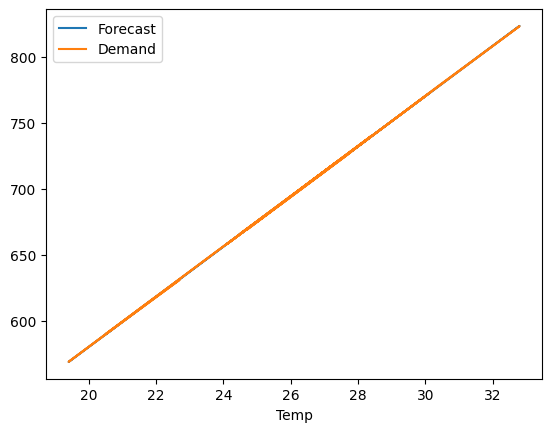

In [151]:
r_xy = np.corrcoef(bottled_water["Temp"], bottled_water["Demand"])[0, 1]
s_x = np.std(bottled_water["Temp"], ddof=1)
s_y = np.std(bottled_water["Demand"], ddof=1)
beta_1 = r_xy * s_y / s_x
beta_0 = np.mean(bottled_water["Demand"]) - beta_1 * np.mean(bottled_water["Temp"])
print(f"beta_0: {beta_0}, beta_1: {beta_1}")

bottled_water["Forecast"] = beta_0 + beta_1 * bottled_water["Temp"]
bottled_water[["Forecast", "Demand", "Temp"]].plot(x="Temp")

In [154]:
next_match_temps = np.array([21.6, 27.3, 26.6])
next_match_forecasts = beta_0 + beta_1 * next_match_temps
next_match_forecasts

array([610.64171951, 718.81220569, 705.52811089])

## 2.7

a) For the moving average we can simply use the concatenation of (D, y) for y so far. That is once we have $t$ that is greater than the length of $D$ we start using $y$.

b) Simply the same as above, instead of using only D we use y once we have run out of D.

c) Linear regression requires either observations, or a constant increase in time. Thus, no modification is needed as you can always model it to predict further into the future than one period. If it is an autoregressive linear regression you may simply do the same as above.